In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
from pyvis.network import Network
import networkx as nx
%matplotlib inline

In [3]:
# !pip install plotly

# シンプルな可視化

In [4]:
# data_extractで取得した **_final.tsvシリーズを移動させておく

In [8]:
roma= pd.read_csv('data_graph/ontology_path_v6.tsv', sep='\t',encoding="utf-8")
all_path_name = roma["ja_path_name"].values.tolist()

In [9]:
G_roma = nx.DiGraph()  # 有向グラフ (Directed Graph)
for item in set(all_path_name):
    if type(item) == str:
        nx.add_path(G_roma, item.split("/"))# 1 → 2 → 3 → 4 → 5

# ネットワークのインスタンス生成
g = Network(directed=True)  # Trueにすると有向グラフ。デフォルトはFalseで無向グラフ)
g.from_nx(G_roma)
g.show("data_graph/all.html")# グラフをhtmlで出力

In [6]:
# kana= pd.read_csv('data_graph/kana_final_p.tsv', sep='\t',encoding="shift-jis")
# kana_ja_path_name = kana["ja_path_name"].values.tolist()

In [7]:
# G_kana = nx.DiGraph()  # 有向グラフ (Directed Graph)

# for item in set(kana_ja_path_name):
#     if type(item) == str:
#         nx.add_path(G_kana, item.split("/"))# 1 → 2 → 3 → 4 → 5

# g = Network(directed=True)  # Trueにすると有向グラフ。デフォルトはFalseで無向グラフ)
# g.from_nx(G_roma)
# g.show("data_graph/kana_2.html")# グラフをhtmlで出力

In [8]:
roma_item = []

for item in set(roma_ja_path_name):
    if type(item) == str:
        roma_item.append(item.split("/")[-1])

In [9]:
kana_item = []

for item in set(kana_ja_path_name):
    if type(item) == str:
        kana_item.append(item.split("/")[-1])

In [9]:
# kana_item

# Node2Vec

In [23]:
# !pip install ipywidgets widgetsnbextension
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [24]:
# !jupyter labextension install @jupyter-widgets/jupyterlab-manager

In [12]:
from tqdm.notebook import tqdm
from ipywidgets import IntProgress
from node2vec import Node2Vec
n2v_obj_roma = Node2Vec(G_roma, dimensions=10,walk_length=5, num_walks=10, p=1, q=1, workers=1)
n2v_model_roma = n2v_obj_roma.fit(window=10, min_count=1, batch_words=4)
n2v_model_roma.save("data_graph/n2v_model_roma.model")

Computing transition probabilities:   0%|          | 0/534 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 135.89it/s]


In [13]:
n2v_obj_kana = Node2Vec(G_kana, dimensions=10,walk_length=5, num_walks=10, p=1, q=1, workers=1)
n2v_model_kana = n2v_obj_kana.fit(window=10, min_count=1, batch_words=4)
n2v_model_kana.save("data_graph/n2v_model_kana.model")

Computing transition probabilities:   0%|          | 0/740 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 77.30it/s]


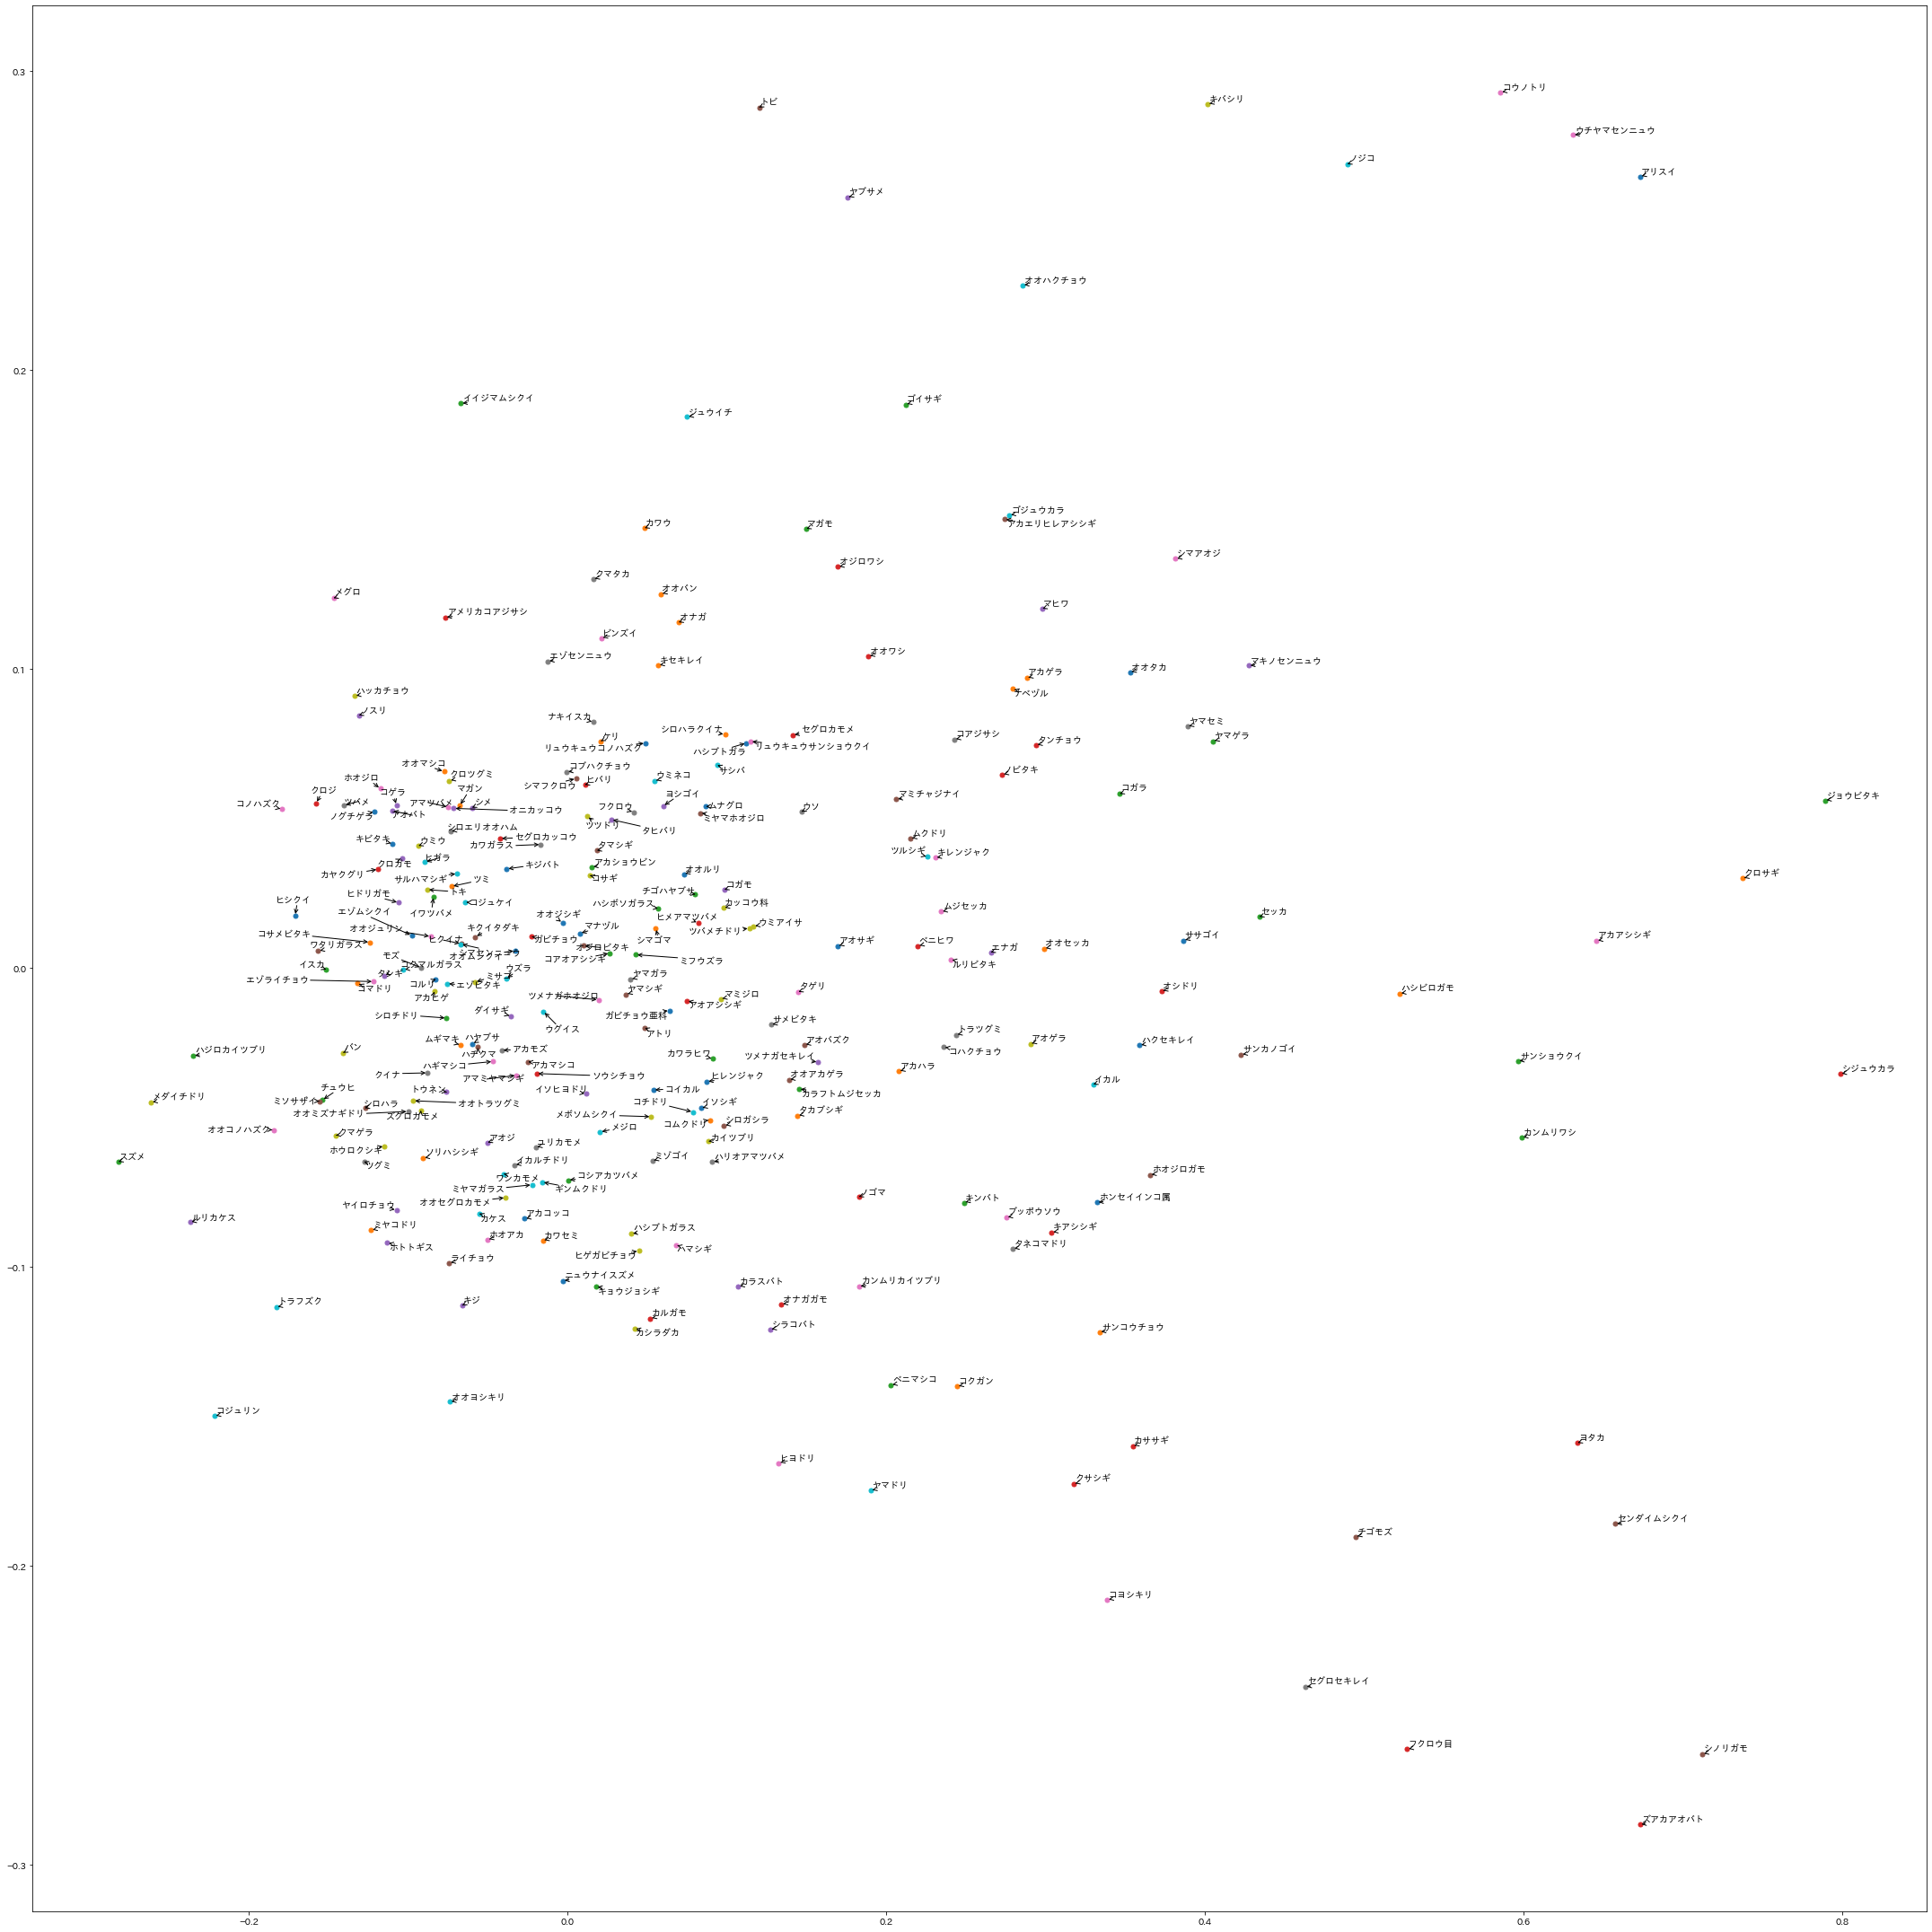

In [52]:
from sklearn.decomposition import PCA
# from adjustText import adjust_text

vec = n2v_model_roma.wv.vectors
pca = PCA(n_components=2)
pca.fit(vec)
X_2d = pca.transform(vec)

plt.figure(figsize = (30, 30))
labels = []
for i in range(len(roma_item)):
	plt.plot(X_2d[i][0], X_2d[i][1], ms=5.0, zorder=2, marker='o')
	labels.append(plt.annotate(roma_item[i], (X_2d[i][0], X_2d[i][1])))

adjust_text(labels, arrowprops=dict(arrowstyle='->', color='black'))
plt.tight_layout()
plt.savefig("data_graph/roma_n2v.png") 
plt.show()

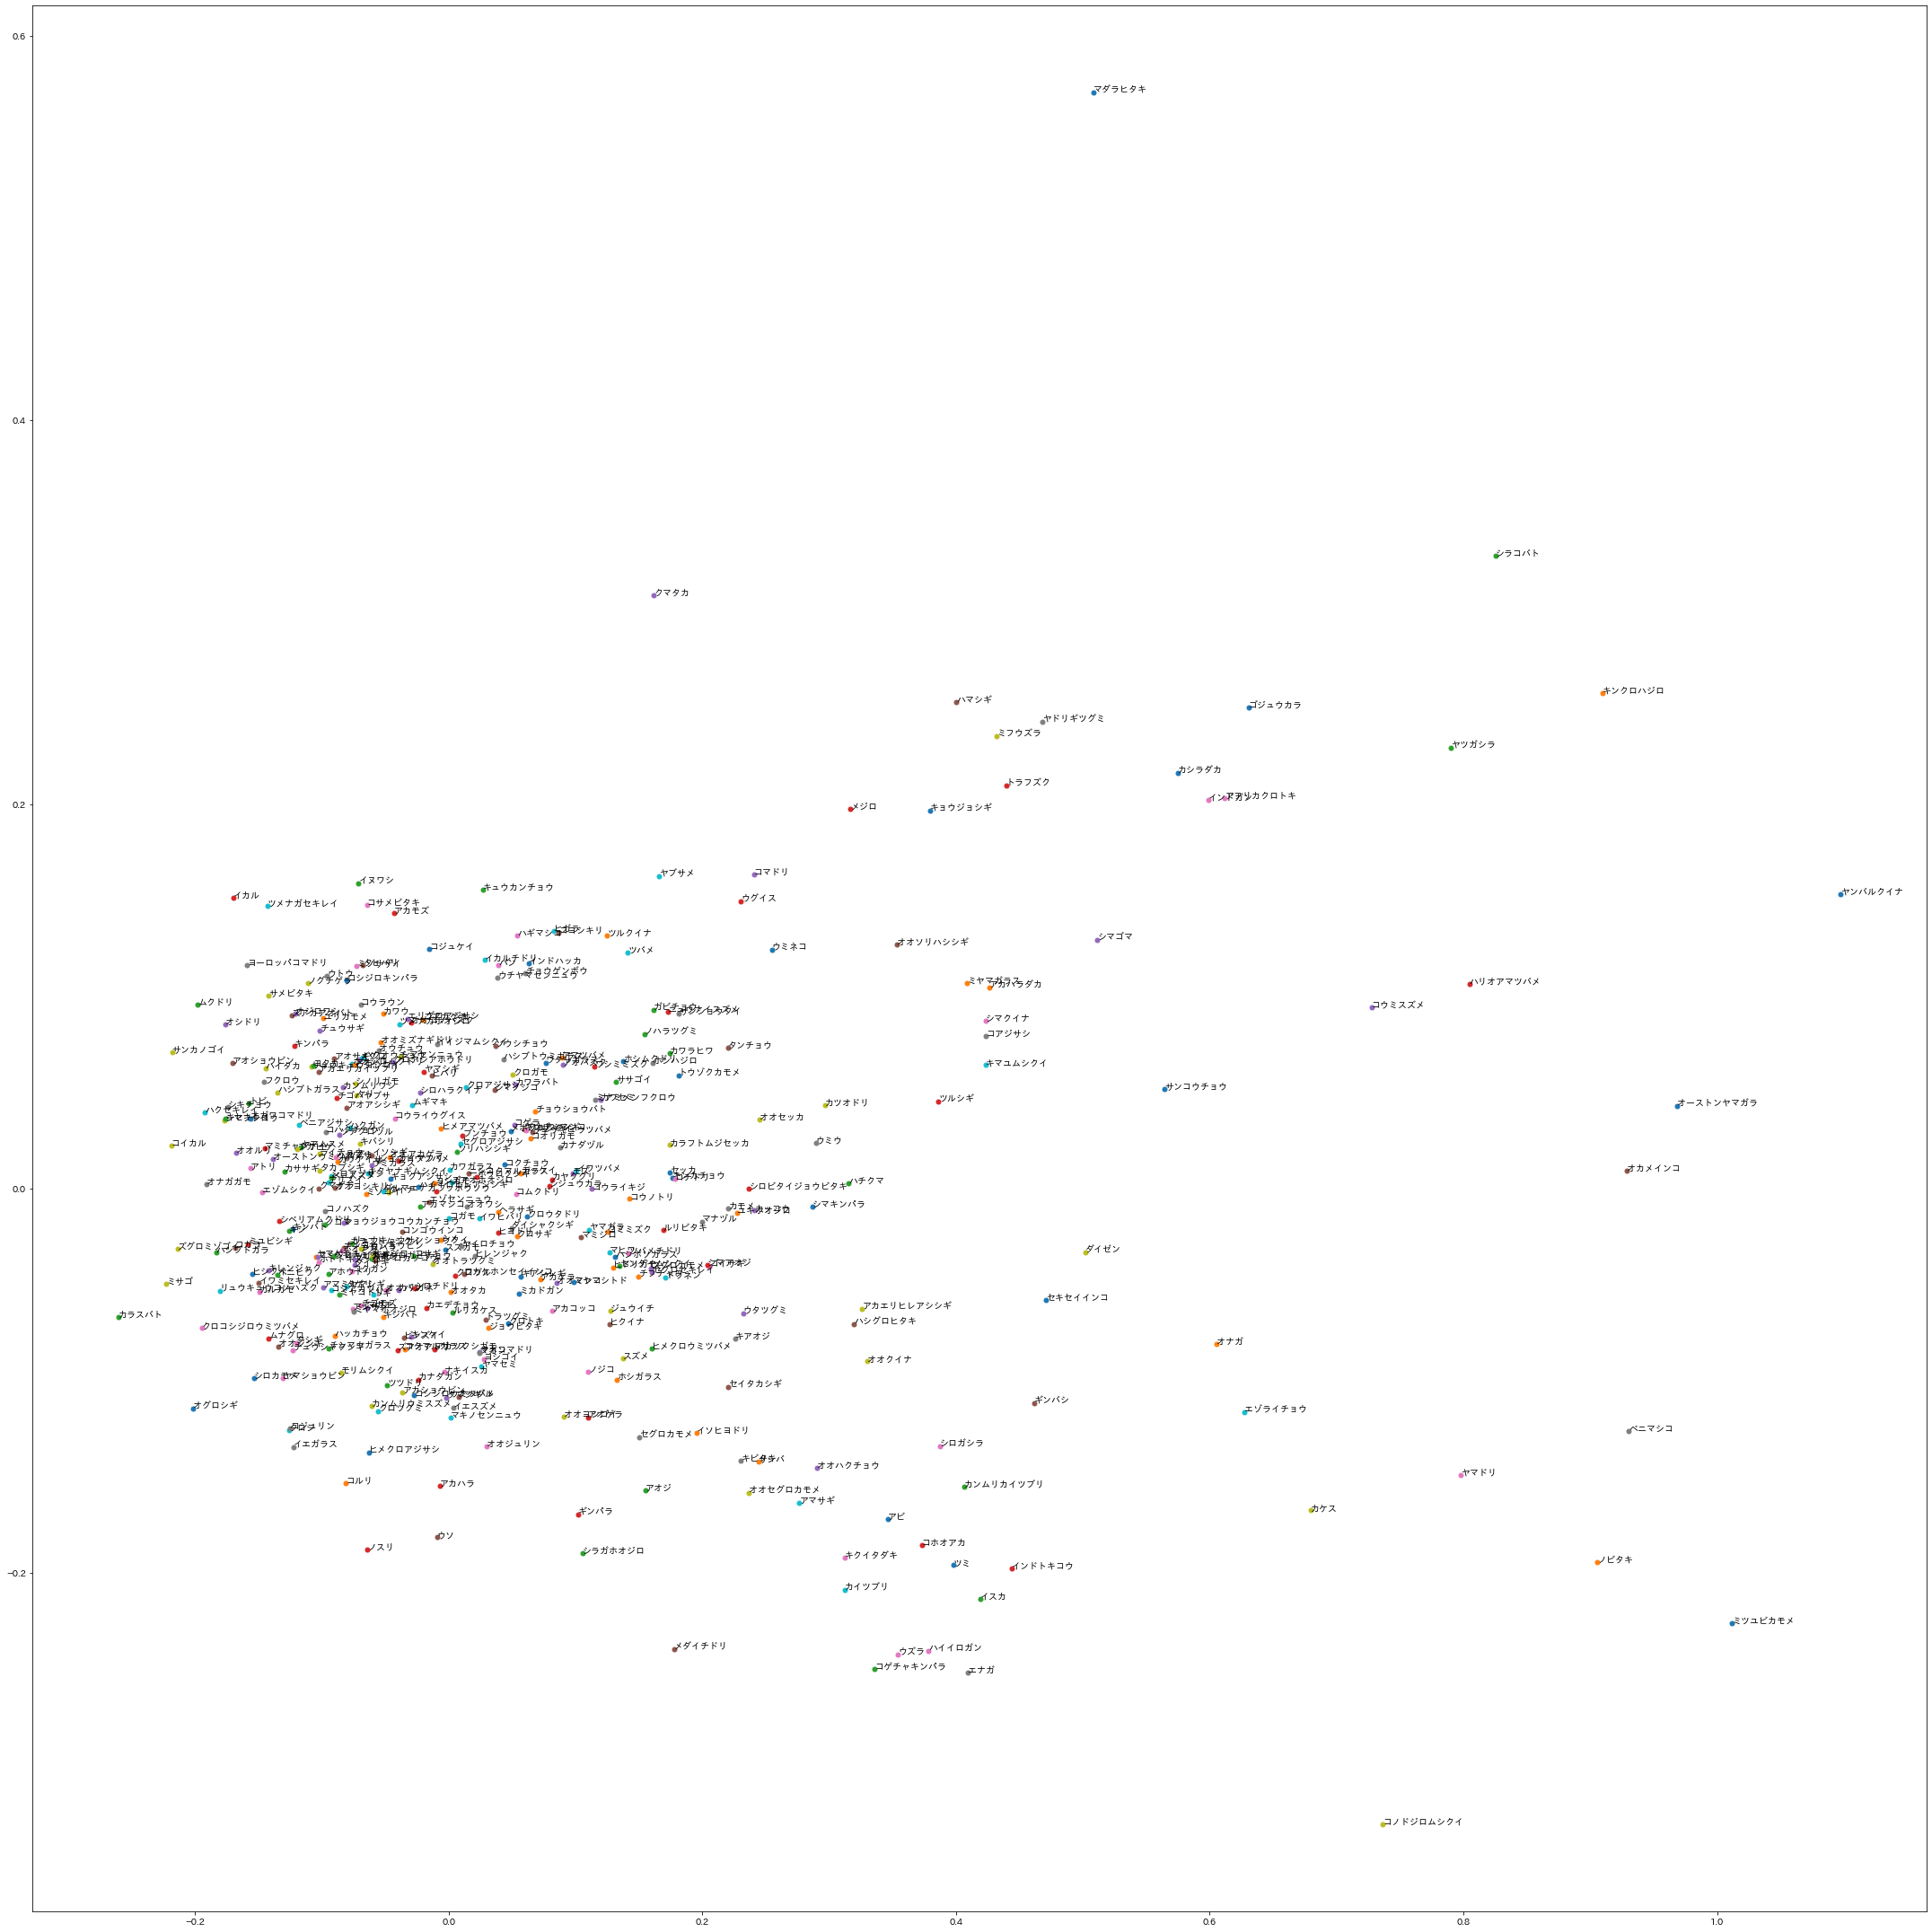

In [50]:
vec = n2v_model_kana.wv.vectors
pca = PCA(n_components=2)
pca.fit(vec)
X_2d = pca.transform(vec)

plt.figure(figsize = (30, 30))
labels = []
for i in range(len(kana_item)):
	plt.plot(X_2d[i][0], X_2d[i][1], ms=5.0, zorder=2, marker='o')
	labels.append(plt.annotate(kana_item[i], (X_2d[i][0], X_2d[i][1])))

adjust_text(labels, arrowprops=dict(arrowstyle='->', color='black'))
plt.savefig("data_graph/kana_n2v.png") 
plt.tight_layout()
plt.show()